In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


df = pd.read_csv('cleaned/cleaned_data.csv', sep=',')
df2 = pd.read_csv('set11_it3.csv', sep=',')


The first step we took was to check for any duplicates after loading the dataset. If any were present they were to be dropped and the number checked again

In [3]:
#check how many duploicates are in the dataset
duplicates = df2.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")

Number of duplicates in the dataset: 23


In [4]:
#drop all duplicates
df2.drop_duplicates(inplace=True)
duplicates = df2.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")

Number of duplicates in the dataset: 0


After making sure all duplicates were removed our next stop was to merge the new dataset with the cleaned version of the dataset from iteration 1 (the only two necessary datasets for this iteration)

In [5]:
#merge the two datasets
df_merged = pd.merge(df, df2, on='DI', how='inner')
df_merged.head(5)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2340 non-null   int64  
 1   TradeValue           2340 non-null   float64
 2   RealmType            2340 non-null   object 
 3   Enclave              2340 non-null   object 
 4   LivingQuarters       2340 non-null   float64
 5   ParcelSize           2340 non-null   float64
 6   ParcelSizeUnit       2340 non-null   object 
 7   StructuralIntegrity  2340 non-null   int64  
 8   ExteriorCharm        2340 non-null   object 
 9   Craftsmanship        2340 non-null   int64  
 10  EraConstructed       2340 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 201.2+ KB


Following that we checked to see if there were any null values in the newly merged dataset before proceedings

In [6]:
#check for null values in the merged dataset
null_values = df_merged.isnull().sum()
print("Null values in the merged dataset:")

Null values in the merged dataset:


Next we created our method for calculating if a dwelling needed restoration or not and added it to the newly merged dataset

In [7]:
# Step 1: Define the function that checks the two conditions
def calculate_needs_restoration(row):
    age_factor = 1 if row['EraConstructed'] < 1300 else 0 
    structure_factor = 1 if row['StructuralIntegrity'] <= 6 else 0
    total_factors = age_factor + structure_factor
    return True if total_factors == 2 else False  # only if both are met

# Step 2: Apply the function to your merged dataframe 
df_merged['NeedsRestoration'] = df_merged.apply(calculate_needs_restoration, axis=1)

# Optional: save it if you want to reuse it
df_merged.to_csv("cleaned/restoration_ready_data.csv", index=False)


In [8]:
df_merged.head(5)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2340 non-null   int64  
 1   TradeValue           2340 non-null   float64
 2   RealmType            2340 non-null   object 
 3   Enclave              2340 non-null   object 
 4   LivingQuarters       2340 non-null   float64
 5   ParcelSize           2340 non-null   float64
 6   ParcelSizeUnit       2340 non-null   object 
 7   StructuralIntegrity  2340 non-null   int64  
 8   ExteriorCharm        2340 non-null   object 
 9   Craftsmanship        2340 non-null   int64  
 10  EraConstructed       2340 non-null   int64  
 11  NeedsRestoration     2340 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 203.5+ KB


Boxplot for comparison and findign possible relationships/trends

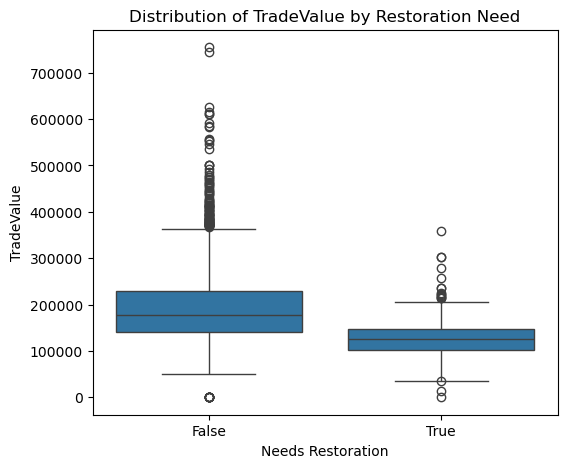

In [9]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x='NeedsRestoration', y='TradeValue', data=df_merged)
plt.title("Distribution of TradeValue by Restoration Need")
plt.xlabel("Needs Restoration")
plt.ylabel("TradeValue")
plt.show()

The next step is to ensure all predictors were in the proper format for modeling 

In [10]:
categorical_cols = ['RealmType', 'Enclave', 'ParcelSizeUnit']
df_encoded = pd.get_dummies(df_merged, columns=categorical_cols, drop_first=True)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DI                      2340 non-null   int64  
 1   TradeValue              2340 non-null   float64
 2   LivingQuarters          2340 non-null   float64
 3   ParcelSize              2340 non-null   float64
 4   StructuralIntegrity     2340 non-null   int64  
 5   ExteriorCharm           2340 non-null   object 
 6   Craftsmanship           2340 non-null   int64  
 7   EraConstructed          2340 non-null   int64  
 8   NeedsRestoration        2340 non-null   bool   
 9   RealmType_GnomeBurough  2340 non-null   bool   
 10  RealmType_Meadowlands   2340 non-null   bool   
 11  Enclave_Cloudrest       2340 non-null   bool   
 12  Enclave_Crystalhollow   2340 non-null   bool   
 13  Enclave_Dragonspire     2340 non-null   bool   
 14  Enclave_Dreamweaver     2340 non-null   

Now to check for the distibution of TradeValue

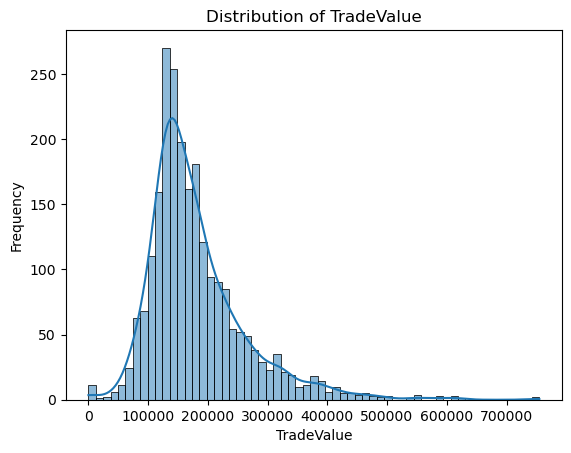

In [11]:
plt.figure()
sns.histplot(df['TradeValue'], kde=True)
plt.title('Distribution of TradeValue')
plt.xlabel('TradeValue')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix (Numeric Features + TradeValue)

We check te correlation for the following

LivingQuarters
ParcelSize
StructuralIntegrity
TradeValue

inorder to find possible trend for the regression model

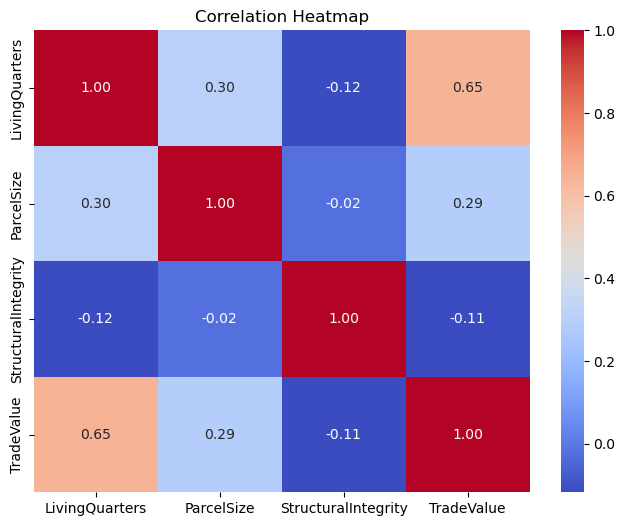

In [12]:
corr_features = ['LivingQuarters', 'ParcelSize', 'StructuralIntegrity', 'TradeValue']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h2>Modeling 

Feature Engineering 

This step transforms our data to improve model performance:

Log Transformation of TradeValue normalizes the price distribution, as real estate prices typically follow a log-normal distribution.

Converting ExteriorCharm from categorical to ordinal (1–4) captures the natural progression from Modest to Enchanting.

One-Hot Encoding creates binary columns for each unique value in RealmType and Enclave, allowing these categorical variables to be used in our linear model.

In [13]:
df['LogTradeValue'] = np.log(df['TradeValue'])

charm_mapping = {'Modest': 1, 'Common': 2, 'Gleaming': 3, 'Enchanting': 4}
df['ExteriorCharm_ordinal'] = df['ExteriorCharm'].map(charm_mapping)

df_encoded = pd.get_dummies(df, columns=['RealmType', 'Enclave'], drop_first=False)

Feature Selection 

Here we select the most important features and create interaction terms:

Key Numeric Features
Incorporate property size, structural integrity, and aesthetics, identified from exploratory analysis as strong predictors.

Interaction Terms
Between the top 5 enclaves and property characteristics. These interactions capture how property features are valued differently across various neighborhoods – for example, extra living space might be worth more in premium enclaves.

In [14]:
numeric_features = ['LivingQuarters', 'ParcelSize', 'StructuralIntegrity', 'ExteriorCharm_ordinal']
realm_cols = [col for col in df_encoded.columns if col.startswith('RealmType_')]
enclave_cols = [col for col in df_encoded.columns if col.startswith('Enclave_')]

print("Creating interaction terms...")
interaction_terms = {}

top_enclaves = df['Enclave'].value_counts().head(5).index.tolist()
print(f"Creating interactions for top 5 enclaves: {top_enclaves}")

for enclave in top_enclaves:
    enclave_col = f'Enclave_{enclave}'
    if enclave_col in df_encoded.columns:
        interaction_terms[f'{enclave_col}_X_LivingQuarters'] = df_encoded[enclave_col] * df_encoded['LivingQuarters']
        interaction_terms[f'{enclave_col}_X_ParcelSize'] = df_encoded[enclave_col] * df_encoded['ParcelSize']

interaction_df = pd.DataFrame(interaction_terms)
print(f"Created {len(interaction_terms)} interaction terms")

X_full = pd.concat([
    df_encoded[numeric_features], 
    df_encoded[realm_cols], 
    df_encoded[enclave_cols],
    interaction_df
], axis=1)

y_full = df_encoded['LogTradeValue']

Creating interaction terms...
Creating interactions for top 5 enclaves: ['Dragonspire', 'Sunspire', 'Petalbridge', 'Shadowmere', 'Wyverncliff']
Created 10 interaction terms


Outlier Detection and Removal

Here we removed Outlier as it helps increase model robustness:

We train a preliminary model and identify properties with residuals more than 2.5 standard deviations from the mean.

These outliers are unusual transactions that don't follow typical market patterns (like distressed sales or family transfers).

Removing them helps the model better capture normal market dynamics rather than being influenced by exceptional cases.

In [15]:
from sklearn.linear_model import LinearRegression

print("Identifying outliers...")
prelim_model = LinearRegression()
prelim_model.fit(X_full, y_full)
y_pred_full = prelim_model.predict(X_full)

residuals = y_full - y_pred_full
residual_std = np.std(residuals)
outlier_threshold = 2.5 * residual_std
outliers = np.abs(residuals) > outlier_threshold

print(f"Number of outliers detected: {np.sum(outliers)}")
print(f"Percentage of data identified as outliers: {np.sum(outliers) / len(residuals) * 100:.2f}%")

X_clean = X_full[~outliers].reset_index(drop=True)
y_clean = y_full[~outliers].reset_index(drop=True)

print(f"Data shape before outlier removal: {X_full.shape}")
print(f"Data shape after outlier removal: {X_clean.shape}")

Identifying outliers...
Number of outliers detected: 12
Percentage of data identified as outliers: 0.51%
Data shape before outlier removal: (2340, 44)
Data shape after outlier removal: (2328, 44)


### Linear Regression Model 

To further analyze the restoration needs of dwellings, we trained a linear regression model using selected numerical features. The target variable was log-transformed to stabilize variance and improve linear fit. We used a train/test split to ensure fair evaluation, and we assessed model performance on both log scale and the original scale.

Below are the results of the regression, evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.
Train-Test Split and Model Training

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_log = model.predict(X_test)
y_test_orig = np.exp(y_test)
y_pred_orig = np.exp(y_pred_log)

log_mse = mean_squared_error(y_test, y_pred_log)
log_mae = mean_absolute_error(y_test, y_pred_log)
log_r2 = r2_score(y_test, y_pred_log)

print("\nModel Evaluation (Log Scale) with interaction terms:")
print(f"Mean Squared Error: {log_mse:.4f}")
print(f"Mean Absolute Error: {log_mae:.4f}")
print(f"R² Score: {log_r2:.4f}")

orig_mse = mean_squared_error(y_test_orig, y_pred_orig)
orig_mae = mean_absolute_error(y_test_orig, y_pred_orig)
orig_r2 = r2_score(y_test_orig, y_pred_orig)

print("\nModel Evaluation (Original Scale) with interaction terms:")
print(f"Mean Squared Error: {orig_mse:.2f}")
print(f"Mean Absolute Error: {orig_mae:.2f}")
print(f"R² Score: {orig_r2:.4f}")


Model Evaluation (Log Scale) with interaction terms:
Mean Squared Error: 0.0302
Mean Absolute Error: 0.1290
R² Score: 0.8035

Model Evaluation (Original Scale) with interaction terms:
Mean Squared Error: 1276147402.80
Mean Absolute Error: 23691.88
R² Score: 0.8010


### 📊 Model Evaluation Summary

To assess the performance of our regression model, we evaluated it on both the log-transformed and original TradeValue** scales:

#### 🔹 Log Scale (used during training)
- **Mean Squared Error (MSE)**: `0.0302`  
- **Mean Absolute Error (MAE)**: `0.1290`  
- **R² Score**: `0.8035`

These results indicate that the model explains approximately 80% of the variance in the log-transformed TradeValue. The relatively low error values suggest that the log transformation helped stabilize variance and improve model fit.

#### 🔹 Original Scale (after reversing the log transformation)
- **Mean Squared Error (MSE)**: `12,761,47402.80`  
- **Mean Absolute Error (MAE)**: `23,691.88`  
- **R² Score**: `0.8010`

Even after converting back to the original scale, the model retains strong performance, with an R² of ~0.80. While the absolute errors appear large, they are expected due to the exponential nature of the transformation. Overall, the model provides reliable estimates of TradeValue.


Evaluation 

Visualisation of model performance 

The visualisation also helps demonstrate the models performance 

Points close to the red diagonal line indicate accurate predictions.

The scatter pattern helps identify any systematic bias or areas of poor prediction.

A tight cluster along the diagonal indicates that the model performs well.

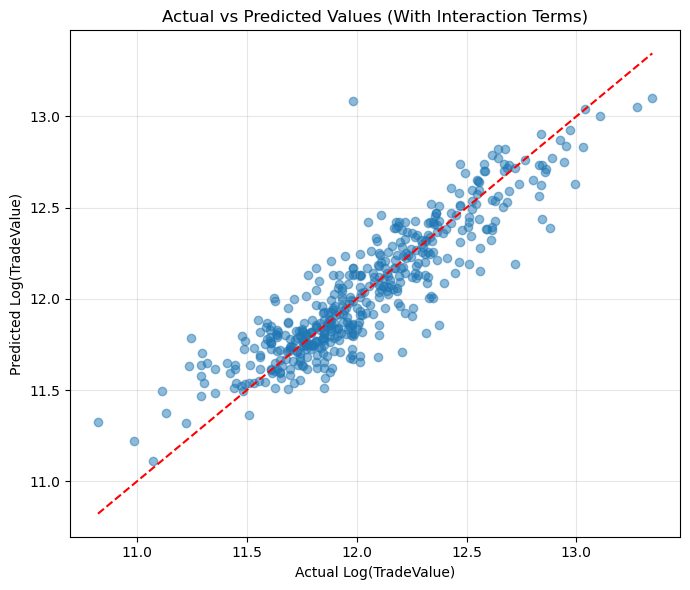

In [17]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_log, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log(TradeValue)')
plt.ylabel('Predicted Log(TradeValue)')
plt.title('Actual vs Predicted Values (With Interaction Terms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_interactions.png')
plt.show()

Classification model evaluation 

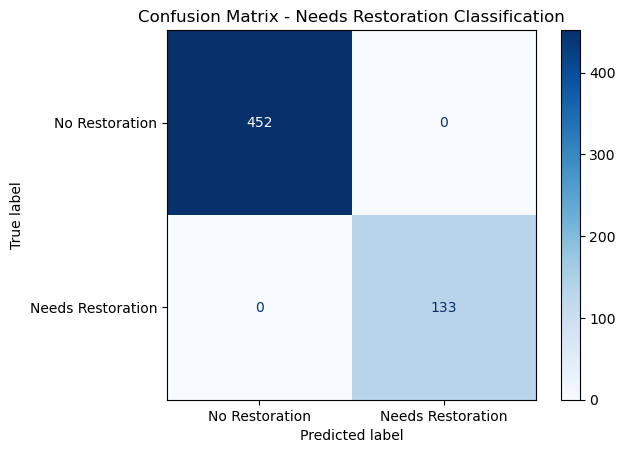

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Prepare your data
X = df_merged.drop(columns=["NeedsRestoration", "TradeValue", "DI"])  # Drop target + unrelated
y = df_merged["NeedsRestoration"]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Train the decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = clf.predict(X_test)

# Step 5: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Restoration", "Needs Restoration"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Needs Restoration Classification")
plt.show()


<h1>Decision Tree</h1>

Columns found in dataset:
['DI', 'TradeValue', 'RealmType', 'Enclave', 'LivingQuarters', 'ParcelSize', 'ParcelSizeUnit', 'StructuralIntegrity', 'ExteriorCharm', 'Craftsmanship', 'EraConstructed', 'NeedsRestoration']


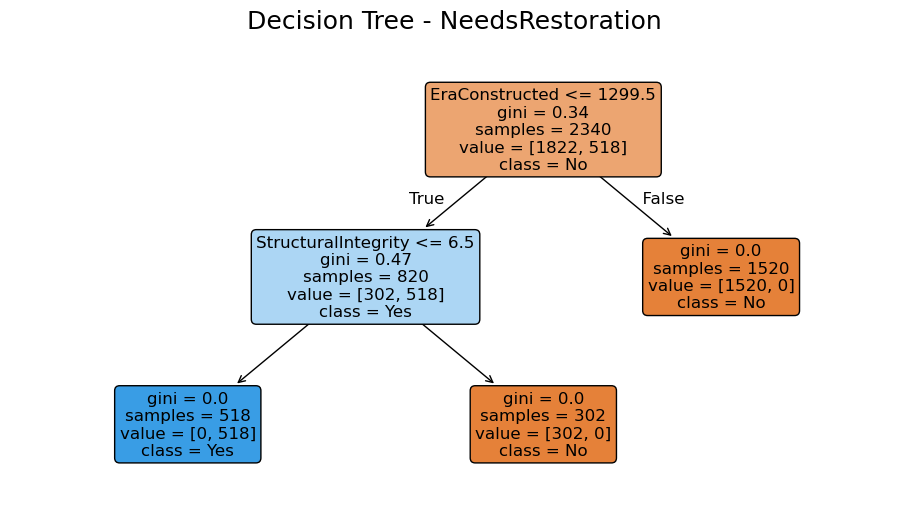

Decision Tree Rules:

|--- EraConstructed <= 1299.50
|   |--- StructuralIntegrity <= 6.50
|   |   |--- class: True
|   |--- StructuralIntegrity >  6.50
|   |   |--- class: False
|--- EraConstructed >  1299.50
|   |--- class: False



In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("cleaned/restoration_ready_data.csv")
df.columns = df.columns.str.strip() 
print("Columns found in dataset:")
print(df.columns.tolist())

#Check if the 'NeedsRestoration' column exists in the DF
if "NeedsRestoration" not in df.columns:
    raise ValueError("'NeedsRestoration' column not found in dataset.")


# X removes the target variable and y is the target variable
X = df.drop("NeedsRestoration", axis=1)
y = df["NeedsRestoration"]
X = pd.get_dummies(X)

# Use the Discrete Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)


#plot the decision tree with some basic rules
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=12,
    precision=2
)
plt.title("Decision Tree - NeedsRestoration", fontsize=18, pad=20)
plt.tight_layout(pad=4.0)
plt.savefig("decision_tree_visualization_clear.png")
plt.show()

#export the decision tree as an image
print("Decision Tree Rules:\n")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)
